In [2]:
import numpy as np
feature = np.arange(6,21)
print(feature)
label = (feature * 3) + 4
print(label)

[ 6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
[22 25 28 31 34 37 40 43 46 49 52 55 58 61 64]


In [3]:
import numpy as np
noise = (np.random.random([15]) * 4) - 2
print(noise)
label = label + noise
print(label)

[-0.35311343  1.56088318  1.21400288  1.11173221 -0.97471684 -0.51085108
 -1.76760513  0.50819767  0.4137494  -1.31273008  0.23713442 -0.40626557
 -0.74028651 -0.59776618 -0.00652837]
[21.64688657 26.56088318 29.21400288 32.11173221 33.02528316 36.48914892
 38.23239487 43.50819767 46.4137494  47.68726992 52.23713442 54.59373443
 57.25971349 60.40223382 63.99347163]


In [4]:
import numpy as np
import pandas as pd
my_data = np.array([[0, 3], [10, 7], [20, 9], [30, 14], [40, 15]])

# Create a Python list that holds the names of the two columns.
my_column_names = ['temperature', 'activity']

# Create a DataFrame.
my_dataframe = pd.DataFrame(data=my_data, columns=my_column_names)

# Print the entire DataFrame
print(my_dataframe)

   temperature  activity
0            0         3
1           10         7
2           20         9
3           30        14
4           40        15


Epoch 1/50
2/2 [==============================] - 0s 13ms/step - loss: 157.5254 - root_mean_squared_error: 12.5509
Epoch 2/50
2/2 [==============================] - 0s 8ms/step - loss: 113.9537 - root_mean_squared_error: 10.6749
Epoch 3/50
2/2 [==============================] - 0s 9ms/step - loss: 88.4943 - root_mean_squared_error: 9.4071
Epoch 4/50
2/2 [==============================] - 0s 7ms/step - loss: 71.6896 - root_mean_squared_error: 8.4670
Epoch 5/50
2/2 [==============================] - 0s 7ms/step - loss: 56.8627 - root_mean_squared_error: 7.5407
Epoch 6/50
2/2 [==============================] - 0s 8ms/step - loss: 45.9489 - root_mean_squared_error: 6.7786
Epoch 7/50
2/2 [==============================] - 0s 8ms/step - loss: 37.2470 - root_mean_squared_error: 6.1030
Epoch 8/50
2/2 [==============================] - 0s 7ms/step - loss: 29.6324 - root_mean_squared_error: 5.4436
Epoch 9/50
2/2 [==============================] - 0s 8ms/step - loss: 23.5634 - root_mean_squared_e

/usr/local/lib/python3.10/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


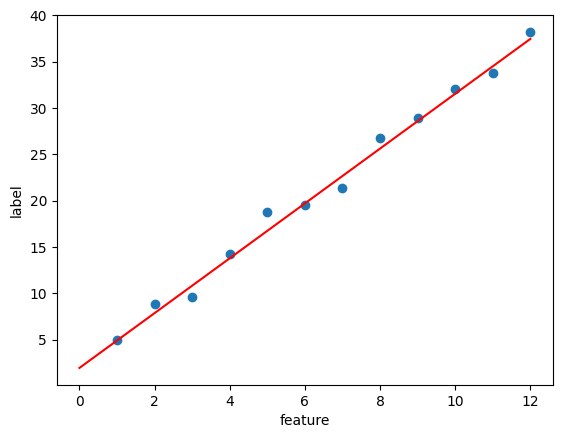

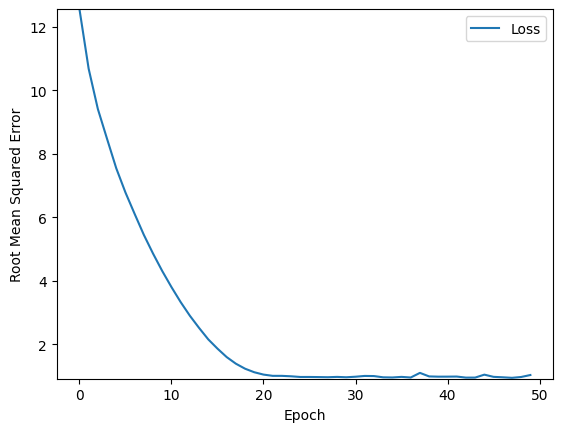

In [5]:
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Dense(units=1,
                                  input_shape=(1,)))
  model.compile(optimizer=tf.keras.optimizers.experimental.RMSprop(learning_rate=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])
  return model


def train_model(model, feature, label, epochs, batch_size):
  """Train the model by feeding it data."""
  history = model.fit(x=feature,
                      y=label,
                      batch_size=batch_size,
                      epochs=epochs)
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]
  epochs = history.epoch
  hist = pd.DataFrame(history.history)
  rmse = hist["root_mean_squared_error"]
  return trained_weight, trained_bias, epochs, rmse


def plot_the_model(trained_weight, trained_bias, feature, label):
  """Plot the trained model against the training feature and label."""
  plt.xlabel("feature")
  plt.ylabel("label")
  plt.scatter(feature, label)
  x0 = 0
  y0 = trained_bias
  x1 = feature[-1]
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')
  plt.show()


def plot_the_loss_curve(epochs, rmse):
  """Plot the loss curve, which shows loss vs. epoch."""
  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")
  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()

my_feature = ([1.0, 2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0, 10.0, 11.0, 12.0])
my_label   = ([5.0, 8.8,  9.6, 14.2, 18.8, 19.5, 21.4, 26.8, 28.9, 32.0, 33.8, 38.2])

learning_rate=0.05
epochs=50
my_batch_size=6
my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, my_label, epochs, my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

Epoch 1/3
142/142 [==============================] - 1s 2ms/step - loss: 56220340224.0000 - root_mean_squared_error: 237108.2812
Epoch 2/3
142/142 [==============================] - 0s 2ms/step - loss: 55855747072.0000 - root_mean_squared_error: 236338.2031
Epoch 3/3
142/142 [==============================] - 0s 2ms/step - loss: 55492784128.0000 - root_mean_squared_error: 235569.0625


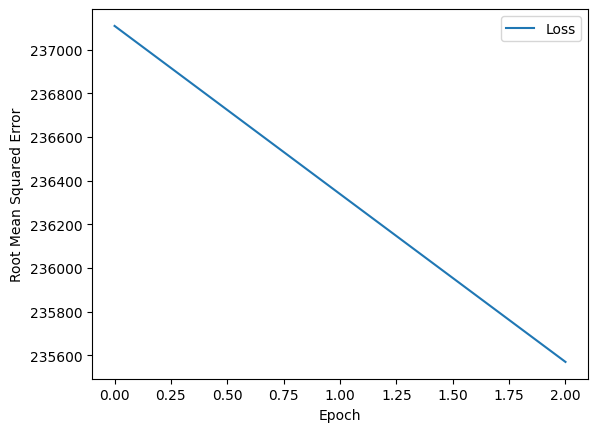

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
    2  53000            2193
    2  92500            2451
    2  69100            2327
    2  62000            2687
    1  80000            2136
    2 295300            2993
    2 500001            2666
    2 342500            2949
    4 117600            4374
    2 128300            2747
    2 187300            2970
    3  79500            3195
    2 111900            2985
    2  95200            2860
    2  69300            2670


In [6]:
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Dense(units=1,
                                  input_shape=(1,)))
  model.compile(optimizer=tf.keras.optimizers.experimental.RMSprop(learning_rate=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])
  return model


def train_model(model, df, feature, label, epochs, batch_size):
  """Train the model by feeding it data."""
  history = model.fit(x=df[feature],
                      y=df[label],
                      batch_size=batch_size,
                      epochs=epochs)
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]
  epochs = history.epoch
  hist = pd.DataFrame(history.history)
  rmse = hist["root_mean_squared_error"]
  return trained_weight, trained_bias, epochs, rmse

def plot_the_model(trained_weight, trained_bias, feature, label) :
  """Plot the trained model against 200 random training examples."""
  plt.xlabel(feature)
  plt.ylabel(label)
  random_examples = training_df.sample(n=200)
  plt.scatter(random_examples[feature], random_examples[label])
  x0 = 0
  y0 = trained_bias
  x1 = random_examples[feature].max()
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0,x1], [y0,y1], c='r')
  plt.show()


def plot_the_loss_curve(epochs, rmse) :
  """Plot a curve loss vs. epoch. """
  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")
  plt.plot(epochs, rmse, label = "Loss")
  plt.legend()
  plt.show()


learning_rate = 2
epochs = 3
batch_size = 120

my_feature = "rooms_per_person"
my_label = "median_house_value"
my_model = None
my_model = build_model(learning_rate)
#filepath_or_buffer get the .csv file from a random web
training_df = pd.read_csv(filepath_or_buffer="https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")
training_df["rooms_per_person"] = training_df["total_rooms"] / training_df["population"]
weight, bias, epochs, rmse = train_model(my_model, training_df, my_feature, my_label, epochs, batch_size)
plot_the_loss_curve(epochs, rmse)

# print("\n The learned weight for your model is %.4f" % weight)
# print("The learned bias for your model is %.4f \n" %bias)
# plot_the_model(trained_weight, trained_bias, my_feature, my_label)
# plot_the_loss_curve(epochs, rmse)

def predict_house_values(n, feature, label):
  """Predict house values based on a feature."""

  batch = training_df[feature][10000:10000 + n]
  predicted_values = my_model.predict_on_batch(x=batch)

  print("feature   label          predicted")
  print("  value   value          value")
  print("          in thousand$   in thousand$")
  print("--------------------------------------")
  for i in range(n):
    print ("%5.0f %6.0f %15.0f" % (training_df[feature][10000 + i],
                                   training_df[label][10000 + i],
                                   predicted_values[i][0] ))

predict_house_values(15, my_feature, my_label)

In [7]:
training_df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
rooms_per_person      0
dtype: int64